# Home Credit Default Risk

Outline:
* Load the data
* Join tables with Polars - a DataFrame library implemented in Rust language, very fast and memory efficient.  
* Create features
* Train models
* Create a submission table

## Load the data
Data loading and polars code credit: https://www.kaggle.com/code/jetakow/home-credit-2024-starter-notebook

In [1]:
import polars as pl
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 

dataPath = "./data/"

In [2]:
def set_table_dtypes(df: pl.DataFrame) -> pl.DataFrame:
    # implement here all desired dtypes for tables
    # the following is just an example
    for col in df.columns:
        # last letter of column name will help you determine the type
        if col[-1] in ("P", "A"):
            df = df.with_columns(pl.col(col).cast(pl.Float64).alias(col))

    return df

In [3]:
def convert_strings(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:  
        if df[col].dtype.name in ['object', 'string']:
            df[col] = df[col].astype("string").astype('category')
            current_categories = df[col].cat.categories
            new_categories = current_categories.to_list() + ["Unknown"]
            new_dtype = pd.CategoricalDtype(categories=new_categories, ordered=True)
            df[col] = df[col].astype(new_dtype)
    return df

## Data information
* basetable:
* static:
* static_cb:
 

In [4]:
# from  vectorization import *
#from data_reduction import *
compiled = pd.read_csv("W:/Erdos/Project/home_credit/data/csv_files/master_data_file.csv")

In [5]:
# vectorize_dataframe(train_static_cb.to_pandas())
# vectorize(train_static_cb.to_pandas())
# vectorize_dataframe_for_nn(train_static_cb.to_pandas())


In [6]:
# type(train_static_cb), type(train_static_cb.columns)

In [7]:
# print(train_static.dtypes.unique())


In [8]:
compiled.columns[:20], compiled.dtypes.unique()
# compiled.head

(Index(['case_id', 'date_decision', 'MONTH', 'WEEK_NUM', 'target',
        'actualdpd_943P', 'actualdpdtolerance_344P', 'addres_district_368M',
        'addres_role_871L', 'addres_zip_823M', 'amount_1115A', 'amount_416A',
        'amount_4527230A', 'amount_4917619A', 'amtdebitincoming_4809443A',
        'amtdebitoutgoing_4809440A', 'amtdepositbalance_4809441A',
        'amtdepositincoming_4809444A', 'amtdepositoutgoing_4809442A',
        'amtinstpaidbefduel24m_4187115A'],
       dtype='object'),
 array([dtype('int64'), dtype('O'), dtype('bool')], dtype=object))

In [9]:
compiled

,case_id,date_decision,MONTH,WEEK_NUM,target,actualdpd_943P,actualdpdtolerance_344P,addres_district_368M,addres_role_871L,addres_zip_823M,...,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,totaloutstanddebtvalue_668A,totalsettled_863A,totinstallast1m_4525188A,twobodfilling_608L,type_25L,typesuite_864L,validfrom_1069D
0,0,2019-01-03,201901,0,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,0,1,-1,-1
1,1,2019-01-03,201901,0,0,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,0,1,-1,-1
2,2,2019-01-04,201901,0,0,3,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,0,0,0,-1
3,3,2019-01-03,201901,0,0,3,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,0,1,0,-1
4,4,2019-01-04,201901,0,1,3,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526654,2703450,2020-10-05,202010,91,0,3,3,0,-1,0,...,-1,-1,-1,-1,3,3,0,0,-1,-1
1526655,2703451,2020-10-05,202010,91,0,3,3,0,-1,0,...,-1,-1,-1,-1,3,3,0,0,-1,-1
1526656,2703452,2020-10-05,202010,91,0,3,3,0,-1,0,...,-1,-1,-1,-1,1,-1,1,0,-1,-1
1526657,2703453,2020-10-05,202010,91,0,3,3,0,-1,0,...,-1,-1,-1,-1,3,1,1,0,-1,-1


In [10]:
# vectorize_dataframe(compiled)

In [11]:
from src.classification import *

In [12]:
# labels = np.random.randint(2, size=(num_rows, 1))  # Generates 0 or 1
# print(labels.shape)
# # Create DataFrame
# df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd'])
# df['e'] = labels
# print(df)

X = compiled.loc[:, compiled.columns != "target"]
y = compiled.loc[:, compiled.columns == "target"]
# print(X.columns, y.columns)
train_loader, test_loader = data_split(X, y)

print("training..")

train_loss, val_loss = train_SimpleNN(train_loader, test_loader)
print("DONE")

training..
GPU is available. Using the GPU...
Train_features: 466
Model saved at epoch 1 with Validation Loss: 0.1226
Best model was saved at epoch 1 with a validation loss of 0.1226
Epoch 1/100, Training Loss: 0.1400, Validation Loss: 0.1226 finished in 10.20 seconds
Model saved at epoch 2 with Validation Loss: 0.1211
Best model was saved at epoch 2 with a validation loss of 0.1211
Epoch 2/100, Training Loss: 0.1218, Validation Loss: 0.1211 finished in 22.58 seconds
Model saved at epoch 3 with Validation Loss: 0.1209
Best model was saved at epoch 3 with a validation loss of 0.1209
Epoch 3/100, Training Loss: 0.1207, Validation Loss: 0.1209 finished in 35.65 seconds
Model saved at epoch 4 with Validation Loss: 0.1205
Best model was saved at epoch 4 with a validation loss of 0.1205
Epoch 4/100, Training Loss: 0.1199, Validation Loss: 0.1205 finished in 48.38 seconds
Model saved at epoch 5 with Validation Loss: 0.1203
Best model was saved at epoch 5 with a validation loss of 0.1203
Epoch

In [13]:
train_loss, val_loss

([0.13998713363846077,
  0.12179429469395386,
  0.12066208913849145,
  0.11994083614718114,
  0.11936241809016554,
  0.11892824811455466,
  0.11860435335316166,
  0.11818018221523485,
  0.1178347110114199,
  0.11754679375018699,
  0.11723249465373456,
  0.1169456149376746,
  0.11660552189461339,
  0.11637950938579103,
  0.11612696400592058,
  0.11582540489013769,
  0.11553372426870022,
  0.11532085921779982,
  0.11506786429111383,
  0.11481145584007722,
  0.11462035884931318,
  0.1143891301048758,
  0.1141093440609946,
  0.11384149170107224,
  0.11359660937138354,
  0.11345086494268646,
  0.1132410331072862,
  0.11298381215275408,
  0.11276244820871446,
  0.11260269023782883,
  0.11241024859408115,
  0.11214751327096342,
  0.11200994481187795,
  0.1117829330106999,
  0.11155282120706601,
  0.11139622507479695,
  0.11125727133206571,
  0.11103073105142862,
  0.1108928581794233,
  0.11076025740409638,
  0.11047540658722142,
  0.11038741615712155,
  0.11023831765019562,
  0.11005966827492

In [14]:

def save_losses_to_csv_pandas(training_loss, validation_loss, filename='loss_data.csv'):
    # Create a DataFrame from the losses
    data = pd.DataFrame({
        'Epoch': range(1, len(training_loss) + 1),
        'Training Loss': training_loss,
        'Validation Loss': validation_loss
    })
    
    # Save the DataFrame to a CSV file
    data.to_csv(filename, index=False)

# Example usage:
save_losses_to_csv_pandas(train_loss, val_loss, filename="W:/Erdos/Project/home_credit/data/csv_files/loss_data.csv")


In [18]:
vals= data_split(X, y, return_dfs=True)


In [29]:
vals

(array([[-1.638155  , -0.78880575, -1.54504904, ...,  1.59166515,
          1.66375947, -0.33224741],
        [-0.85857389, -0.72174561, -1.1248452 , ...,  1.59166515,
          1.66375947, -0.33224741],
        [ 0.12475399, -0.69939222, -0.87272289, ..., -0.42557731,
         -0.60104842, -0.33224741],
        ...,
        [-1.54213254, -0.56527193,  0.17778673, ...,  1.59166515,
          1.66375947, -0.33224741],
        [-0.02905999, -0.78880575, -1.58706943, ..., -0.42557731,
         -0.60104842, -0.33224741],
        [-1.55600562, -0.58762531,  0.00970519, ..., -0.42557731,
          1.66375947, -0.33224741]]),
 array([[ 0.8766724 ,  1.6253595 ,  1.94264288, ..., -0.42557731,
         -0.60104842, -0.33224741],
        [-0.42254692,  1.53594598,  1.27031673, ...,  1.59166515,
          1.66375947, -0.33224741],
        [ 0.88096757,  1.6253595 ,  1.94264288, ..., -0.42557731,
         -0.60104842, -0.33224741],
        ...,
        [ 0.65089199,  1.44653245,  0.55597019, ..., -

In [30]:
import matplotlib.pyplot as plt
def plotfigure(train, validation):
    fig = plt.figure(figsize=(12,6))
    plt.plot(train, label="Training Loss", color='royalblue', linestyle='-', linewidth=2)
    plt.plot(validation, label="Validation Loss", color='crimson', linestyle='--', linewidth=2)
    plt.title("Training and Validation Loss over Epochs", fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel("Validation Loss", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.minorticks_on()
    plt.grid(which="major", linestyle=':', linewidth='0.5',color='black')
    min_val_loss = min(validation)
    min_val_loss_idx  =validation.index(min_val_loss)
    arrowprops = dict(arrowstyle="->", connectionstyle="arc3,rad=.5", color='gray')
    plt.annotate(f"lowest validation Loss\nEpoch:{min_val_loss_idx+1}\nLoss{min_val_loss:0.4f}",xy=(min_val_loss_idx,min_val_loss), xycoords='data', xytext=(-60,30), textcoords='offset points', arrowprops=arrowprops, fontsize=12, color='gray')
    plt.tight_layout()
    plt.show()
    fig.savefig("W:/Erdos/Project/home_credit/data/simplenn-losses.png")

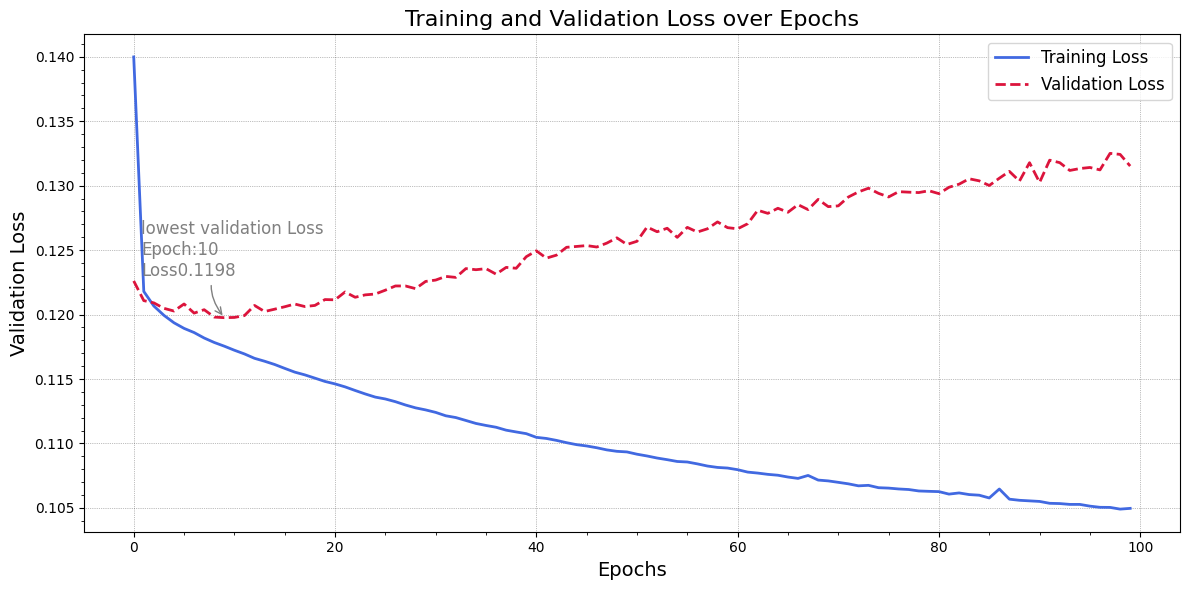

In [31]:
plotfigure(train_loss,val_loss)

In [ ]:
def gini_stability(base, w_fallingrate=88.0, w_resstd=-0.5):
    gini_in_time = base.loc[:, ["WEEK_NUM", "target", "score"]]\
        .sort_values("WEEK_NUM")\
        .groupby("WEEK_NUM")[["target", "score"]]\
        .apply(lambda x: 2*roc_auc_score(x["target"], x["score"])-1).tolist()
    
    x = np.arange(len(gini_in_time))
    y = gini_in_time
    a, b = np.polyfit(x, y, 1)
    y_hat = a*x + b
    residuals = y - y_hat
    res_std = np.std(residuals)
    avg_gini = np.mean(gini_in_time)
    return avg_gini + w_fallingrate * min(0, a) + w_resstd * res_std

stability_score_train = gini_stability(base_train)
stability_score_valid = gini_stability(base_valid)
stability_score_test = gini_stability(base_test)

print(f'The stability score on the train set is: {stability_score_train}') 
print(f'The stability score on the valid set is: {stability_score_valid}') 
print(f'The stability score on the test set is: {stability_score_test}')  